<a href="https://colab.research.google.com/github/shaina-12/Artificial-Intelligence/blob/main/Machine%20Learning/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
from google.colab import drive
drive.mount('/content/drive/')
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/spam.csv',encoding='Windows-1252')
data.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [47]:
data = data.iloc[:,0:2]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
data = data.rename(columns={'v1':'labels','v2':'message'})
data.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [56]:
data.isnull().sum()

labels     0
message    0
dtype: int64

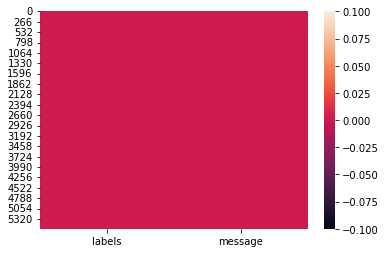

In [57]:
sns.heatmap(data.isnull(),cbar='plasma')

In [58]:
data.dtypes

labels     object
message    object
dtype: object

In [59]:
data.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [60]:
data.groupby('labels').count()

,message
labels,
ham,4825
spam,747


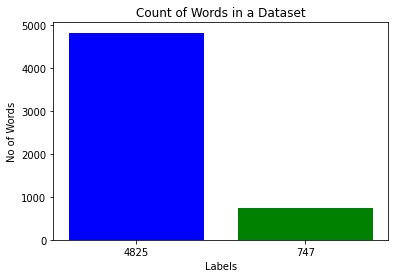

In [61]:
x = np.arange(2)
y = data.value_counts(data['labels'],sort=True)
plt.bar(x,y,color=['blue','green'])
plt.xticks(x,y)
plt.title('Count of Words in a Dataset')
plt.xlabel('Labels')
plt.ylabel('No of Words')
plt.show()

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['labels'] = le.fit_transform(data['labels'])
data.head()

,labels,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [63]:
from sklearn.feature_extraction.text import CountVectorizer
vectors = CountVectorizer(stop_words='english')
x = vectors.fit_transform(data['message'])

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
x_train, x_test, y_train, y_test = train_test_split(x,data['labels'],test_size=0.2,random_state=10)
svm_model = SVC(kernel='linear',C=1)
svm_model.fit(x_train,y_train)
y_pred = svm_model.predict(x_test)

Text(0.5, 257.44, 'Predicted label')

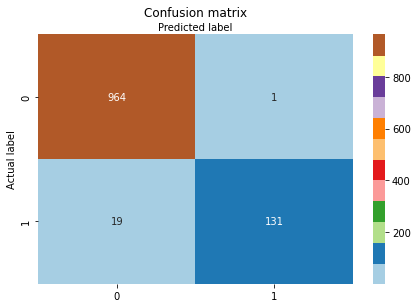

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cnf_matrix = confusion_matrix(y_test,y_pred)
class_names = ['ham','spam']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='Paired',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')

In [66]:
print(accuracy_score(y_test,y_pred))

0.9820627802690582


In [67]:
print(classification_report(y_test,y_pred,target_names=class_names))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

